In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv(r"C:\Users\Aufar\Documents\edm\used_car_data.csv") #Membaca Data terlebih dahulu
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


### Question 1
Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut? 

In [5]:
df_merek = df.copy()
df_merek['Merek'] = df_merek.Name.str.split().str.get(0)
df_merek['Merek'] = df_merek['Merek'].str.lower()

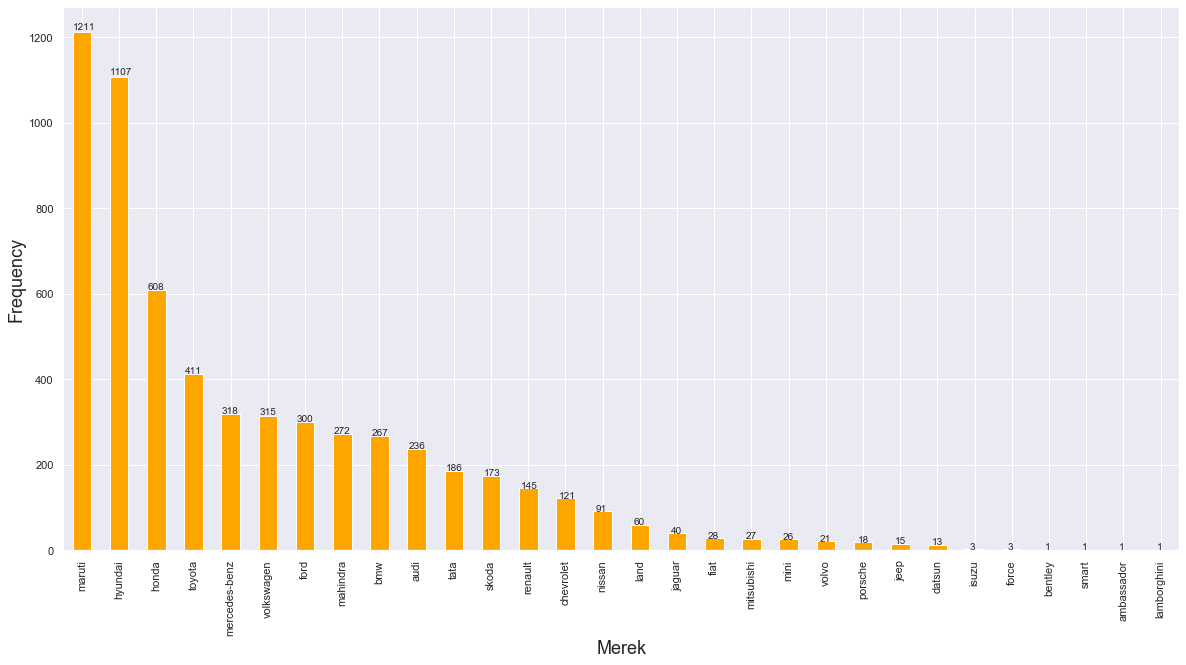

In [6]:
ax = df_merek['Merek'].value_counts().plot(kind='bar', figsize=(20,10), color ='orange')
plt.xlabel('Merek', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Mobil memiliki banyak sekali nama dan merek, dimana biasanya pada nama mobile tersebut terdapat merek dari mobil itu sendiri. Kita ambil satu contoh pada sebuah mobil dengan nama Honda Odyssey 2020, kita bisa langsung tahu bahwa mobil tersebut memiliki merek Honda.
Pada soal nomor 1, kita diminta untuk mengidentifikasi merek mobil apa saja yang ada pada dataset beserta jumlahnya. Pertama kita harus mendapatkan merek mobil dari masing-masing data dimana kita tidak memiliki merek mobil setiap datanya. Namun perlu diperhatikan bahwasannya kita masih memiliki nama mobil, sehingga kita bisa mendapatkan merek mobil dari nama mobil itu sendiri. Jika dilihat merek mobil selalu berada pada kata pertama dari setiap nama mobil, sehingga langkah pertama yang harus dilakukan adalah mengambil kata pertama pada nama mobil untuk semua data. Setelah merek mobil diperoleh, langkah selanjutnya adalah menghitung jumlah masing-masing merek. Hasil dari perhitungan tersebut bisa dilihat pada grafik di atas.
Berdasarkan grafik diatas bisa kita  simpulkan bahwasannya terdapat 30 merek mobil dengan total mobil sebanyak 6019. Adapun mobil dengan jumlah terbanyak yaitu mobil dengan merek Maruti dengan total 1211 unit dan jumlah terendah yaitu lamborghini, ambassador, bentley, dan smart dengan masing-masing 1 unit.

### Question 2
Kota apa yang memiliki mobil bekas paling banyak?

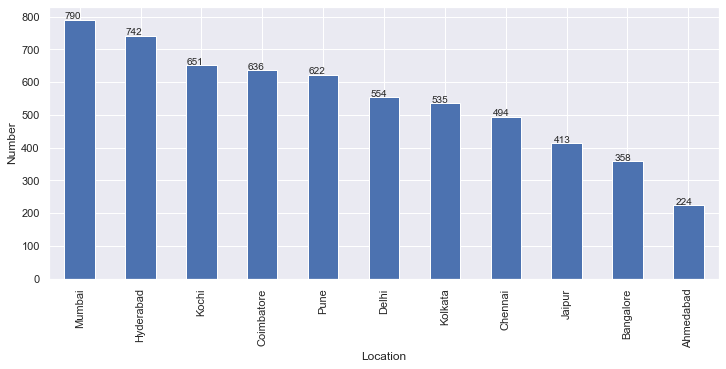

In [7]:
ax = df['Location'].value_counts().plot(kind='bar',figsize=(12,5))
plt.xlabel('Location')
plt.ylabel('Number')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Berdasarkan grafik diatas maka dapat disimpulkan bahwa kota yang memiliki mobil bekas paling banyak adalah Kota Mumbai senilai 784 unit

### Question 3
Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001991AD8C5C8>]],
      dtype=object)

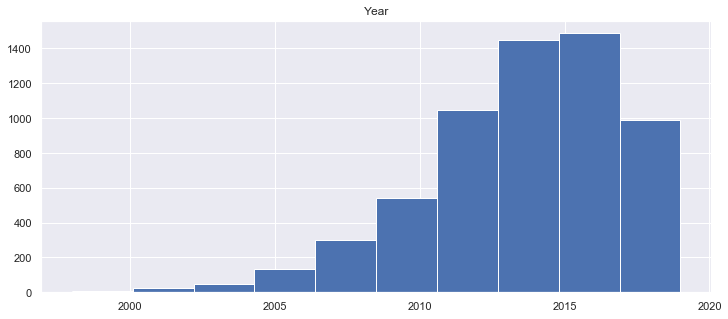

In [8]:
df.hist(column='Year',figsize=(12,5))

Berdasarkan grafik diatas maka didapatkan informasi bahwa data memiliki jenis distribusi negatif (left skewed distribution) atau data yang lebih banyak ada di bagian kiri.

### Question 4
Berapa banyak mobil yang memiliki total jarak pemakaian dibawah 100.000 kilometer ?

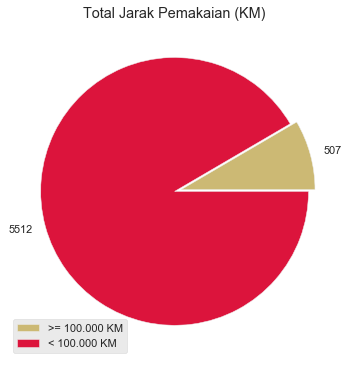

In [10]:
plt.rcParams['figure.figsize'] = (6, 9)
plt.style.use('ggplot')

count = 0
for i in df['Kilometers_Driven']:
    if i > 100000:
        count += 1
        
sisa = len(df) - count

a = [count, sisa]
b = ['>= 100.000 KM', '< 100.000 KM']
explode = (0.05, 0)

plt.pie(a, labels=a,explode=explode, colors=['y', 'crimson'])
plt.title('Total Jarak Pemakaian (KM)')

plt.legend(b,loc=3)
plt.show()

Setelah dilakukan pengelompokan terhadap kendaran mana yang memiliki total jarak pemakaian dibawah 100.000 KM, terdapat 5512 kendaraan seperti pada grafik Pie diatas.

### Question 5
Pada batas berapa kilometre total jarak pemakaian bias dikategorikan sebagai rendah atau tinggi ? Sertakan argumen yang mendukung jawaban

In [26]:
df = df.drop(2328) # Menghapus Data Outlier

Untuk menjawab pertanyaan ini, penulis menggunakan metode clustering untuk mengkategorikan batas berapa kilometer total jarak pemakaian. Penulis melakukan clustering menggunakan algoritma K-Means. Tapi ternyata saat melakukan clustering, penulis menemukan data outlier yang merusak proses clustering. Untuk lebih lengkapnya terhadap data outlier, akan di jawab di nomor 6. Oleh karena itu, sebelum melakukan clustering, penulis menghilangkan terlebih dahulu data outlier tersebut agar data bersifat konsisten dan proses pengkategorian lebih akurat. Berikut adalah grafik hasil dari clustering menggunakan algoritma K-Means :

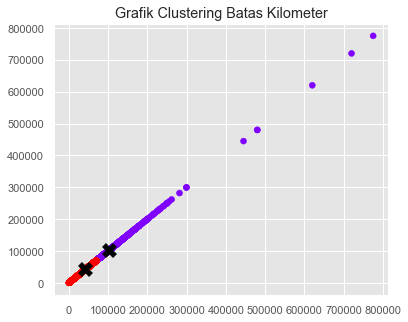

In [27]:
from sklearn.cluster import KMeans
import numpy as np

plt.rcParams['figure.figsize'] = (6, 5)
plt.style.use('ggplot')

k1 = df['Kilometers_Driven'].values
k2 = df['Kilometers_Driven'].values
K = np.array(list(zip(k1, k2)))
#plt.scatter(f1, f2, c='black', s=7)

kmeans3 = KMeans(n_clusters=2)  
kmeans3.fit(K)  
plt.title("Grafik Clustering Batas Kilometer")
plt.scatter(K[:,0],K[:,1], c=kmeans3.labels_, cmap='rainbow')  
plt.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], color='black', marker="X", s=200)  
kluster = kmeans3.labels_.tolist() # Results in a list similar to this: [0, 0, 1, 1]

Terdapat 2 cluster, yaitu cluster batas jarak rendah dan batas jarak tinggi. Selanjutnya agar mengetahui batas dari kategori jarak rendah dan tinggi dari total data keseluruhan, penulis merubah hasil cluster tersebut ke bentuk dataframe agar lebih jelas melihat kategorinya. Berikut adalah dataframe yang telah penulis buat :

In [29]:
labelKluster = []

nomor = 0
for i in kluster:
    
    if i > 0:
        labelKluster.append('Rendah')
    else:
        labelKluster.append('Tinggi')
        
    nomor += 1
        
df1 = pd.DataFrame({'Kilometers Driven': df['Kilometers_Driven'].values, 'Kluster':labelKluster})
df1

,Kilometers Driven,Kluster
0,72000,Rendah
1,41000,Rendah
2,46000,Rendah
3,87000,Tinggi
4,40670,Rendah
...,...,...
6013,27365,Rendah
6014,100000,Tinggi
6015,55000,Rendah
6016,46000,Rendah


Setelah mengetahui kategori setiap jarak, maka saatnya menentukan batas akhir yang membedakan antara kategori rendah dan tinggi. Penulis mengurutkan nilai pada dataframe, dan mencari nilai kategori rendah tertinggi, dan nilai kategori tinggi terendah (Tujuannya untuk mencari batas akhir yg paling tepat). Lalu didapatkan bahwa batas bahwa sebuah kendaraan dapat dikategorikan memiliki total kilometer jarak rendah yaitu adalah dibawah sekitar 73100 KM. Sedangkan dapat dikategorikan memiliki total kilometer jarak tinggi yaitu diatas sekitar 73150 KM. Dapat dilihat pada dataframe berikut:

In [30]:
df1 = df1.sort_values(by=['Kilometers Driven'])

nomor = 0
for i in df1['Kluster']:
    if i == 'Tinggi':
        print(nomor)
        break
    
    nomor += 1

4532


In [31]:
df1.iloc[4520:4540]

,Kilometers Driven,Kluster
338,73000,Rendah
2626,73000,Rendah
5228,73000,Rendah
2349,73000,Rendah
3550,73000,Rendah
2371,73000,Rendah
5936,73000,Rendah
1377,73003,Rendah
3617,73042,Rendah
5858,73053,Rendah


### Question 6
Apakah terdapat outlier pada kolom Kilometers_Driven ? Sertakan argument yang mendukung jawaban

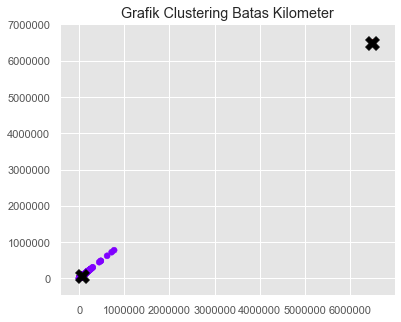

Baris ke - : 2328
Jumlah Kilometer : 6500000


In [32]:
df = pd.read_csv(r"C:\Users\Aufar\Documents\edm\used_car_data.csv") #Membaca Data terlebih dahulu
#6. Data Outlier 

plt.rcParams['figure.figsize'] = (6, 5)
plt.style.use('ggplot')

k1 = df['Kilometers_Driven'].values
k2 = df['Kilometers_Driven'].values
K = np.array(list(zip(k1, k2)))
#plt.scatter(f1, f2, c='black', s=7)

kmeans3 = KMeans(n_clusters=2)  
kmeans3.fit(K)  
plt.title("Grafik Clustering Batas Kilometer")
plt.scatter(K[:,0],K[:,1], c=kmeans3.labels_, cmap='rainbow')  
plt.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], color='black', marker="X", s=200)  
kluster = kmeans3.labels_.tolist() # Results in a list similar to this: [0, 0, 1, 1]
plt.show()

nomor = 0
for i in kluster:
    
    if i > 0:
        print("Baris ke - : " + str(nomor))
        print("Jumlah Kilometer : " + str(df['Kilometers_Driven'][nomor]))
        
    nomor+=1

Seperti pada nomor 5 yang telah penulis jelaskan sebelumnya, bahwa penulis menemukan data outlier saat melakukan clustering. Tepatnya, data outlier tersebut berada pada baris ke 2328, dengan total kilometer yaitu 6.500.000. Tentunya, data ini sangat jauh nilai nya dengan total kilometer lainnya yang dapat merusak proses clustering. Grafik diatas merupakan tahap dimana penulis menemukan data outlier, dan mencari nilai data tersebut.

### Question 7
Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? 

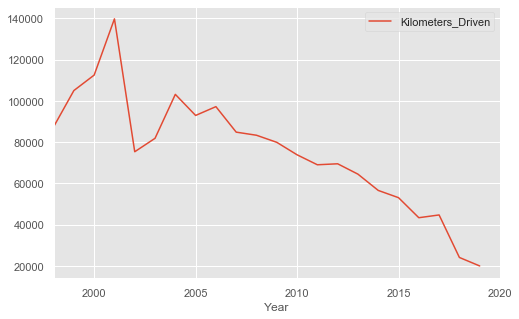

In [46]:
df[['Year','Kilometers_Driven']].corr()['Year']
dft = df[['Year','Kilometers_Driven']].groupby(['Year']).mean().reset_index()
# dft.plot.line(x='Year', y='Kilometers_Driven', figsize=(8,5))
dft.plot.line(x='Year', y='Kilometers_Driven', figsize=(8,5),xticks=[2000,2005,2010,2015,2020])
# dft['Year'].value_counts()

### Question 8
Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih ?

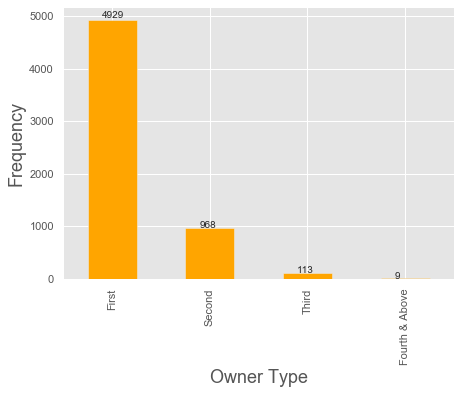

In [47]:
ax = df['Owner_Type'].value_counts().plot(kind='bar', figsize=(7,5), color ='orange')
plt.xlabel('Owner Type', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.145, p.get_height() * 1.01))

In [48]:
freq_type = df['Owner_Type'].value_counts()[2]+df['Owner_Type'].value_counts()[3]
print('Total mobil dengan kepemilikian orang ketiga atau lebih sebanyak: '+str(freq_type))

Total mobil dengan kepemilikian orang ketiga atau lebih sebanyak: 122


Kita bisa mengetahui kepemilikan dari sebuah mobil dengan cara melihat pada kolom “Owner_Type”. Pada kolom tersebut diisi dengan 4 jenis nilai yaitu “first, second, third, danfourth & above”. Sehingga disini kita diminta untuk menghitung jumlah mobil dengan nilai Owner_Type third dan fourth & above. Berdasarkan nilai yang dihasilkan oleh grafik diatas, bisa kita simpulkan bahwa mobil dengan status kepemilikan orang ke-tiga atau lebih sebanyak 122 mobil.

### Question 9
Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat ?

In [49]:
df_mileage = df.copy()
df_mileage['Mileage_number'] = df_mileage.Mileage.str.split().str.get(0)
df_mileage['Mileage_number'] = df_mileage['Mileage_number'].astype(float)
df_mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
Mileage_number       6017 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 611.4+ KB


Tipe bahan bakar dan mileage pada data bisa dilihat dari kolom “Fuel_Type” dan “Mileage”. Berdasarkan pokok permasalah yang diberikan, kita bisa mendapatkan Tipe bahan bakar paling hemat dengan cara mencari mileage minimum dari keseluruhan data. Untuk mempermudah dalam menganalisis data maka dibuatlah histogram penggunaan bahan bakar dimana grafik menunjukan data sebagai berikut.

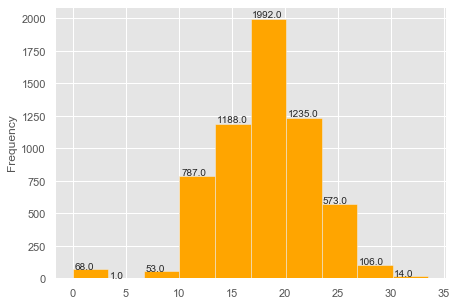

In [50]:
ax = df_mileage['Mileage_number'].plot(kind='hist',figsize=(7,5), color ='orange')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.145, p.get_height() * 1.01))

Langkah selanjutnya adalah mencari nilai minimum dari mileage pada data dan ternyata nilai minimumnya adalah 0.0 kmpl. Menurut penulis data ini tidak wajar, hal ini karena tidak mungkin kendaraan tidak mengkonsumsi bahan bakar kecuali kendaraan tersebut merupakan kendaraan elektrik. Setelah dilihat datanya, ternyata setiap kendaraan dengan mileage 0.0 kmpl, memiliki tipe bahan bakar. Hal ini berarti asumsi pertama akan mobil elektrik tidak bisa digunakan, sehingga mobil dengan mileage 0.0 dianggap outlier dan harus dihapus. Langkah selanjutnya tetap sama yaitu mencari mileage minimum, dan diperoleh sebuah kendaraan dengan  nilai mileage sebesar 6.4 kmpl berbahan bakar petrol. Sehingga dapat disimpulkan bahwa petrol lah bahan bakar yang memiliki mileage paling hemat. 

### Question 10
Apa saja faktor faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban

In [51]:
pd.get_dummies(df.drop('Name',axis=1)).corr()['Price'].sort_values(ascending=False).head(6).to_frame().rename_axis('Feature').reset_index()

,Feature,Price
0,Price,1.000000
1,Transmission_Automatic,0.586025
2,Engine_2993 CC,0.335968
3,Fuel_Type_Diesel,0.320645
4,Year,0.305327
5,Engine_2967 CC,0.261579


Dataframe diatas merupakan hasil penghitungan dengan menggunakan metode corr() . Berdasarkan tabel tersebut didapat informasi bahwa 5 feature yang paling mempengaruhi harga mobil yaitu Power, Engine, Transmission, Brand, dan Fuel Type